# Fright Night 

## Manuscript Revisions

### HR x Emotions, looking at the individual emotions' relationships with hr

#### The different emotions we have are:
1. Amused/Interested
2. Nervous/Jittery
3. Fearful/Afraid
4. Excited/Enthused
5. Shocked/Surprised
6. Alert/Attentive
7. Tense
8. Disgusted/Grossed Out
9. Hostile/Aggressive
10. Irritable/Annoyed
11. Overwhelmed
12. Panicked
13. Upset/Distressed
14. Fearful/Afraid* (Involuntary)
15. Other - excluding from analyses due to small n


First import the packages we need, then read in our csv,
This csv only contains a portion of the original data. Columns including RMSSD, HRD, and LIWC data have been excluded for organizational purposes.


We're also created a cleaner PID column and converting the Emotions column to factors

In [1]:
library(lme4)
library(dplyr)
library(rstatix)
library(sjPlot)
library(ggpubr)
library(ggplot2)
library(wesanderson)
library(latticeExtra)
library(plot3D)

Warning message:
"package 'lme4' was built under R version 3.6.3"Loading required package: Matrix
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'rstatix' was built under R version 3.6.3"Registered S3 methods overwritten by 'car':
  method                          from
  influence.merMod                lme4
  cooks.distance.influence.merMod lme4
  dfbeta.influence.merMod         lme4
  dfbetas.influence.merMod        lme4

Attaching package: 'rstatix'

The following object is masked from 'package:stats':

    filter

Warning message:
"package 'sjPlot' was built under R version 3.6.3"Learn more about sjPlot with 'browseVignettes("sjPlot")'.
Warning message:
"package 'ggpubr' was built under R version 3.6.3"Loading required package: ggplot2
Warning 

In [23]:
hremo <- read.csv("hrEmo.csv")
hremo$PID <- hremo$ï..PID
hremo$Emotions <- factor(hremo$Emotions)

#### Let's first look at the relationship between HR and the Amused/Interested emotion ratings

In [24]:
amuseDF <- subset(hremo, Emotions %in% c("Amused/Interested"))
amuseDF


,ï..PID,FearRatingAudio,ExpFearConvert,UniqueEvent,AvgHR,HRzScore,Description,Emotions,CodedEmotions,EmotionTypeLimited,EmotionType,EmoTypeCodedNegative,EmotionExtent,RegulationExtent,FearType,FearType.1,PID
1,1310,2,2.5,1,80.59,0.116321700,all of us (participants) holding a rope as we entered a segment so we could experience the horror together,Amused/Interested,1,Positive,Positive,Positive,6,4,NA,NA,1310
7,1310,2,2.5,3,81.13,0.183454785,room with 3-d glasses provided. all colors came to life and was very exciting,Amused/Interested,1,Positive,Positive,Positive,7,1,NA,NA,1310
10,1310,3,4.0,4,93.27,1.692706004,walk-through room with short characters wearing all black hoods - walking slowly and mysteriously,Amused/Interested,1,Positive,Positive,Positive,5,4,NA,NA,1310
12,1313,2,2.5,342,107.17,0.044610330,There was a part of the penitentiary that had neon paint splatters and we used 4D glasses.,Amused/Interested,1,Positive,Positive,Positive,7,1,NA,NA,1313
16,1313,2,2.5,5,107.17,0.044610330,There was a hallway with neon paint splatters and a giant spider. It was a skinny hallway.,Amused/Interested,1,Positive,Positive,Positive,7,1,NA,NA,1313
20,1313,2,2.5,6,111.93,0.548603059,There was a school bus with props inside at the beginning of the haunted house.,Amused/Interested,1,Positive,Positive,Positive,6,1,NA,NA,1313
23,1313,1,1.0,7,108.14,0.147314730,In the center of the penitentiary there was an area that broke off into multiple large hallways. We had to go down that while holding a group rope. The hallway was wide and cast members were walking around.,Amused/Interested,1,Positive,Positive,Positive,6,1,NA,NA,1313
26,1313,NA,NA,8,100.93,-0.616086022,"At the beginning of the haunted house, a zombie nurse painted a red ""X"" on my cheek.",Amused/Interested,1,Positive,Positive,Positive,7,1,NA,NA,1313
30,1313,3,4.0,9,108.17,0.150491155,There was a moment in the haunted house where we had to walk through this inflated pillow thing.,Amused/Interested,1,Positive,Positive,Positive,6,1,NA,NA,1313
33,1313,NA,NA,10,97.97,-0.929493265,At the very beginning a cast woman told us the rules about the haunted house and another cast member joined her near the end.,Amused/Interested,1,Positive,Positive,Positive,7,1,NA,NA,1313


Run an mlm with PID as random effect



In [20]:
nrow(amuseDF)
hrAmuse <- lmer(HRzScore~EmotionExtent + (1|PID), amuseDF)
summary(hrAmuse)

[1] 150

Linear mixed model fit by REML ['lmerMod']
Formula: HRzScore ~ EmotionExtent + (1 | PID)
   Data: amuseDF

REML criterion at convergence: 271.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.53391 -0.58645  0.03578  0.57603  2.48112 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept) 0.06272  0.2504  
 Residual             0.29923  0.5470  
Number of obs: 149, groups:  PID, 39

Fixed effects:
              Estimate Std. Error t value
(Intercept)    0.44268    0.23634   1.873
EmotionExtent -0.01488    0.03948  -0.377

Correlation of Fixed Effects:
            (Intr)
EmotinExtnt -0.965

****
#### Now let's look at Nervous/Jittery

In [21]:

jitDF <- subset(hremo, Emotions %in% c("Nervous/Jittery"))
nrow(jitDF)

hrjit <- lmer(HRzScore~EmotionExtent + (1|PID), jitDF)
summary(hrjit)

[1] 70

Linear mixed model fit by REML ['lmerMod']
Formula: HRzScore ~ EmotionExtent + (1 | PID)
   Data: jitDF

REML criterion at convergence: 150.6

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.85335 -0.41603  0.09044  0.74846  1.90739 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept) 0.03082  0.1755  
 Residual             0.44287  0.6655  
Number of obs: 70, groups:  PID, 27

Fixed effects:
              Estimate Std. Error t value
(Intercept)    0.42662    0.37820   1.128
EmotionExtent  0.04338    0.06786   0.639

Correlation of Fixed Effects:
            (Intr)
EmotinExtnt -0.972

****
#### Now let's look at Fearful/Afraid - only looking at voluntary reports

In [22]:
volFearDF <- subset(hremo, Emotions %in% c("Fearful/Afraid"))
nrow(volFearDF)

hrVolFear <- lmer(HRzScore~EmotionExtent + (1|PID), volFearDF)
summary(hrVolFear)

[1] 70

Linear mixed model fit by REML ['lmerMod']
Formula: HRzScore ~ EmotionExtent + (1 | PID)
   Data: volFearDF

REML criterion at convergence: 117.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7289 -0.4112  0.0441  0.6321  1.9308 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept) 0.02207  0.1486  
 Residual             0.28362  0.5326  
Number of obs: 68, groups:  PID, 30

Fixed effects:
              Estimate Std. Error t value
(Intercept)    0.27151    0.27912   0.973
EmotionExtent  0.08408    0.05086   1.653

Correlation of Fixed Effects:
            (Intr)
EmotinExtnt -0.966

#### Look at involuntary fear only


In [23]:
involFearDF <- subset(hremo, Emotions %in% c("Fearful/Afraid*"))
nrow(involFearDF)

hrInVolFear <- lmer(HRzScore~EmotionExtent + (1|PID), involFearDF)
summary(hrInVolFear)

[1] 218

Linear mixed model fit by REML ['lmerMod']
Formula: HRzScore ~ EmotionExtent + (1 | PID)
   Data: involFearDF

REML criterion at convergence: 401.5

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.40982 -0.58445 -0.05283  0.57643  2.30168 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept) 0.1250   0.3536  
 Residual             0.2943   0.5425  
Number of obs: 215, groups:  PID, 43

Fixed effects:
              Estimate Std. Error t value
(Intercept)    0.18535    0.09756   1.900
EmotionExtent  0.06844    0.02718   2.518

Correlation of Fixed Effects:
            (Intr)
EmotinExtnt -0.730

#### Look at voluntary and involuntary fear together

In [24]:
fearDF <- subset(hremo, Emotions %in% c("Fearful/Afraid*", "Fearful/Afraid"))
nrow(fearDF)


hrFear <- lmer(HRzScore~EmotionExtent + (1|PID), fearDF)
summary(hrFear)

[1] 288

Linear mixed model fit by REML ['lmerMod']
Formula: HRzScore ~ EmotionExtent + (1 | PID)
   Data: fearDF

REML criterion at convergence: 514

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.94884 -0.57805 -0.02138  0.58835  2.49076 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept) 0.1046   0.3234  
 Residual             0.2920   0.5403  
Number of obs: 283, groups:  PID, 44

Fixed effects:
              Estimate Std. Error t value
(Intercept)    0.15572    0.08602   1.810
EmotionExtent  0.08584    0.01934   4.439

Correlation of Fixed Effects:
            (Intr)
EmotinExtnt -0.726

****
#### Look at Excited/Enthused


In [25]:
excDF <- subset(hremo, Emotions %in% c("Excited/Enthused"))
nrow(excDF)


hrExc <- lmer(HRzScore~EmotionExtent + (1|PID), excDF)
summary(hrExc)

[1] 81

Linear mixed model fit by REML ['lmerMod']
Formula: HRzScore ~ EmotionExtent + (1 | PID)
   Data: excDF

REML criterion at convergence: 161

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.87474 -0.48597  0.05308  0.39549  2.50867 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept) 0.1057   0.3251  
 Residual             0.3235   0.5688  
Number of obs: 81, groups:  PID, 32

Fixed effects:
              Estimate Std. Error t value
(Intercept)    0.69561    0.44505   1.563
EmotionExtent -0.05355    0.07302  -0.733

Correlation of Fixed Effects:
            (Intr)
EmotinExtnt -0.980

***
#### Look at Shocked/Surprised

In [26]:
surpDF <- subset(hremo, Emotions %in% c("Shocked/Surprised"))
nrow(surpDF)


hrSurp <- lmer(HRzScore~EmotionExtent + (1|PID), surpDF)
summary(hrSurp)

[1] 55

Linear mixed model fit by REML ['lmerMod']
Formula: HRzScore ~ EmotionExtent + (1 | PID)
   Data: surpDF

REML criterion at convergence: 108.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.2743 -0.5613 -0.1351  0.6883  2.2074 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept) 0.05919  0.2433  
 Residual             0.33169  0.5759  
Number of obs: 55, groups:  PID, 31

Fixed effects:
              Estimate Std. Error t value
(Intercept)    1.23311    0.41585   2.965
EmotionExtent -0.10475    0.07338  -1.428

Correlation of Fixed Effects:
            (Intr)
EmotinExtnt -0.976

***
#### Look at Alert/Attentive

In [27]:
attDF <- subset(hremo, Emotions %in% c("Alert/Attentive"))
nrow(attDF)


hrAtt <- lmer(HRzScore~EmotionExtent + (1|PID), attDF)
summary(hrAtt)

[1] 124

Linear mixed model fit by REML ['lmerMod']
Formula: HRzScore ~ EmotionExtent + (1 | PID)
   Data: attDF

REML criterion at convergence: 259

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.44074 -0.52286  0.03232  0.55528  2.31590 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept) 0.08334  0.2887  
 Residual             0.40361  0.6353  
Number of obs: 122, groups:  PID, 38

Fixed effects:
               Estimate Std. Error t value
(Intercept)   0.0001441  0.3625513   0.000
EmotionExtent 0.0815859  0.0590070   1.383

Correlation of Fixed Effects:
            (Intr)
EmotinExtnt -0.977

***
#### Look at Tense

In [28]:
tenseDF <- subset(hremo, Emotions %in% c("Tense"))
nrow(tenseDF)


hrTense <- lmer(HRzScore~EmotionExtent + (1|PID), tenseDF)
summary(hrTense)

[1] 78

Linear mixed model fit by REML ['lmerMod']
Formula: HRzScore ~ EmotionExtent + (1 | PID)
   Data: tenseDF

REML criterion at convergence: 145.1

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.84689 -0.52912  0.08082  0.57170  2.17529 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept) 0.08022  0.2832  
 Residual             0.30541  0.5526  
Number of obs: 76, groups:  PID, 31

Fixed effects:
              Estimate Std. Error t value
(Intercept)    0.25979    0.28861   0.900
EmotionExtent  0.06280    0.05057   1.242

Correlation of Fixed Effects:
            (Intr)
EmotinExtnt -0.955

***
#### Look at Disgusted/Grossed Out - only 16 data points

In [29]:
disDF <- subset(hremo, Emotions %in% c("Disgusted/Grossed Out"))
nrow(disDF)


hrDis <- lmer(HRzScore~EmotionExtent + (1|PID), disDF)
summary(hrDis)

[1] 16

Linear mixed model fit by REML ['lmerMod']
Formula: HRzScore ~ EmotionExtent + (1 | PID)
   Data: disDF

REML criterion at convergence: 25.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.2415 -0.1935  0.1251  0.3785  0.8239 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept) 0.2990   0.5468  
 Residual             0.0445   0.2110  
Number of obs: 16, groups:  PID, 12

Fixed effects:
              Estimate Std. Error t value
(Intercept)    0.82955    0.40614   2.043
EmotionExtent -0.02738    0.06942  -0.394

Correlation of Fixed Effects:
            (Intr)
EmotinExtnt -0.911

***
#### Look at Hostile/Aggressive - too few observations

In [30]:
hosDF <- subset(hremo, Emotions %in% c("Hostile/Aggressive"))
nrow(hosDF)


hrHos <- lmer(HRzScore~EmotionExtent + (1|PID), hosDF)
summary(hrHos)

[1] 2

ERROR: Error: number of levels of each grouping factor must be < number of observations (problems: PID)


***
#### Look at Irritable/Annoyed - getting singular error message

In [31]:
irrDF <- subset(hremo, Emotions %in% c("Irritable/Annoyed"))
nrow(irrDF)


hrIrr <- lmer(HRzScore~EmotionExtent + (1|PID), irrDF)
summary(hrIrr)

[1] 28

boundary (singular) fit: see ?isSingular


Linear mixed model fit by REML ['lmerMod']
Formula: HRzScore ~ EmotionExtent + (1 | PID)
   Data: irrDF

REML criterion at convergence: 63.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.31755 -0.62161  0.09337  0.75408  1.92925 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept) 0.0000   0.0000  
 Residual             0.5066   0.7118  
Number of obs: 28, groups:  PID, 18

Fixed effects:
              Estimate Std. Error t value
(Intercept)   -0.76951    0.48806  -1.577
EmotionExtent  0.27102    0.09803   2.765

Correlation of Fixed Effects:
            (Intr)
EmotinExtnt -0.961
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see ?isSingular


***
#### Look at Overwhelmed - get singularity error message

In [32]:
ovDF <- subset(hremo, Emotions %in% c("Overwhelmed"))
nrow(ovDF)



hrOv <- lmer(HRzScore~EmotionExtent + (1|PID), ovDF)
summary(hrOv)

[1] 31

boundary (singular) fit: see ?isSingular


Linear mixed model fit by REML ['lmerMod']
Formula: HRzScore ~ EmotionExtent + (1 | PID)
   Data: ovDF

REML criterion at convergence: 60.8

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.34720 -0.41137 -0.06922  0.64338  2.29733 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept) 0.0000   0.0000  
 Residual             0.4274   0.6537  
Number of obs: 29, groups:  PID, 19

Fixed effects:
              Estimate Std. Error t value
(Intercept)    0.28262    0.54922   0.515
EmotionExtent  0.07188    0.10022   0.717

Correlation of Fixed Effects:
            (Intr)
EmotinExtnt -0.975
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see ?isSingular


***
#### Look at Panicked

In [33]:
panDF <- subset(hremo, Emotions %in% c("Panicked"))
nrow(panDF)


hrPan <- lmer(HRzScore~EmotionExtent + (1|PID), panDF)
summary(hrPan)

[1] 25

Linear mixed model fit by REML ['lmerMod']
Formula: HRzScore ~ EmotionExtent + (1 | PID)
   Data: panDF

REML criterion at convergence: 45.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.53891 -0.33449 -0.01727  0.46336  1.22775 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept) 0.3213   0.5668  
 Residual             0.1160   0.3406  
Number of obs: 25, groups:  PID, 16

Fixed effects:
              Estimate Std. Error t value
(Intercept)    1.43019    0.48394   2.955
EmotionExtent -0.13270    0.08195  -1.619

Correlation of Fixed Effects:
            (Intr)
EmotinExtnt -0.944

***
#### Look at Upset/Distressed - also get singular error

In [34]:
upsDF <- subset(hremo, Emotions %in% c("Upset/Distressed"))
nrow(upsDF)


hrUps <- lmer(HRzScore~EmotionExtent + (1|PID), upsDF)
summary(hrUps)

[1] 14

boundary (singular) fit: see ?isSingular


Linear mixed model fit by REML ['lmerMod']
Formula: HRzScore ~ EmotionExtent + (1 | PID)
   Data: upsDF

REML criterion at convergence: 29.6

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.50768 -0.09021  0.11485  0.47232  1.10110 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept) 0.0000   0.0000  
 Residual             0.5428   0.7368  
Number of obs: 13, groups:  PID, 9

Fixed effects:
              Estimate Std. Error t value
(Intercept)    1.13220    1.16221   0.974
EmotionExtent -0.08851    0.20374  -0.434

Correlation of Fixed Effects:
            (Intr)
EmotinExtnt -0.984
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see ?isSingular


***

### Summary of results

Recalled voluntary fear + involuntary fear, and involuntary fear alone, was significantly associated with heart rate in the haunted house. However, recalled voluntary fear alone was not associated with heart rate.


The relationship between recalled extent of feeling irritable/annoyed was the only other emotion found to be significantly associated with heart rate, but that model was singular.

## Manuscript Changes to Make:

 - Re-tool the introduction to add more background information
     - hone in on heart rate and fear
     - add more support to the hypotheses
 - Update analyses to focus on arousal and affective recalled intensity, rather than valence
     - get rid of interaction model with pos/neg emotions
          - I also mention in the paper that we ran a test for affective intensity by valence and positive emotions were recalled as being more intense than negative emotions - cut that?


Where to go next? - JESPGen Short Report

## Create a model with negative emotional intensity predicting HR, controlling for positive emotional intensity

In [6]:
setwd("C:\\Users\\joann\\Downloads\\FrightNight\\Manuscript\\Revisions")
df<- read.csv("allSubsLIWC-HRData_44pt.csv")
df$PID <- factor(df$PID)
# na.omit(df)
df

Group,Gender,GenderString,PID,FearRatingAudio,ExpFearConvert,UniqueEvent,Event,Section,HHsection,...,relativ,motion,space,time,CR,ES,ERQ,BDI,EmotionTypeCode,EmoTypeCoded1
1,1,M,1310,2,2.5,1,32,12,4,...,15.79,5.26,10.53,0.00,4.00000,2.5,3.4,2,0,0
1,1,M,1310,2,2.5,1,32,12,4,...,15.79,5.26,10.53,0.00,4.00000,2.5,3.4,2,1,1
1,1,M,1310,2,2.5,1,32,12,4,...,15.79,5.26,10.53,0.00,4.00000,2.5,3.4,2,1,1
1,1,M,1310,NA,NA,2,3,1,NA,...,25.00,6.25,12.50,6.25,4.00000,2.5,3.4,2,1,1
1,1,M,1310,NA,NA,2,3,1,NA,...,25.00,6.25,12.50,6.25,4.00000,2.5,3.4,2,1,1
1,1,M,1310,NA,NA,2,3,1,NA,...,25.00,6.25,12.50,6.25,4.00000,2.5,3.4,2,1,1
1,1,M,1310,2,2.5,3,41-46,15,5,...,13.33,6.67,6.67,0.00,4.00000,2.5,3.4,2,0,0
1,1,M,1310,2,2.5,3,41-46,15,5,...,13.33,6.67,6.67,0.00,4.00000,2.5,3.4,2,0,0
1,1,M,1310,2,2.5,3,41-46,15,5,...,13.33,6.67,6.67,0.00,4.00000,2.5,3.4,2,1,1
1,1,M,1310,3,4.0,4,17,5,1,...,35.71,21.43,14.29,7.14,4.00000,2.5,3.4,2,0,0


In [7]:
myvars <- c("HRzScore","UniqueEvent", "PID", "NegEmosAll", "PosEmosAll", "NegEmosExcludeInvol", "PosEmosExcludeAlert")
newdata <- df[myvars]

In [8]:
newdata

HRzScore,UniqueEvent,PID,NegEmosAll,PosEmosAll,NegEmosExcludeInvol,PosEmosExcludeAlert
0.11632170,1,1310,NA,6,NA,6
0.11632170,1,1310,6,NA,6,NA
0.11632170,1,1310,5,NA,NA,NA
-0.94413241,2,1310,6,NA,6,NA
-0.94413241,2,1310,7,NA,7,NA
-0.94413241,2,1310,4,NA,NA,NA
0.18345479,3,1310,NA,7,NA,7
0.18345479,3,1310,NA,7,NA,7
0.18345479,3,1310,4,NA,NA,NA
1.69270600,4,1310,NA,5,NA,5


In [9]:
data <- newdata %>%
  group_by(PID, UniqueEvent) %>%
  get_summary_stats(HRzScore, NegEmosAll, PosEmosAll, NegEmosExcludeInvol, PosEmosExcludeAlert, type = "mean")
data$n <- NULL #unnecessary 
data

UniqueEvent,PID,variable,mean
70,1302,HRzScore,1.257
70,1302,NegEmosAll,6.000
70,1302,NegEmosExcludeInvol,6.000
70,1302,PosEmosAll,7.000
71,1302,HRzScore,1.257
71,1302,NegEmosAll,5.500
71,1302,NegEmosExcludeInvol,7.000
71,1302,PosEmosAll,7.000
72,1302,HRzScore,1.257
72,1302,NegEmosAll,7.000


In [10]:
data_wide <- spread(data, variable, mean)
data_wide

UniqueEvent,PID,HRzScore,NegEmosAll,NegEmosExcludeInvol,PosEmosAll,PosEmosExcludeAlert
1,1310,0.116,5.500,6.0,6.000,6.0
2,1310,-0.944,5.667,6.5,NA,NA
3,1310,0.183,4.000,NA,7.000,7.0
4,1310,1.693,4.000,4.0,5.000,5.0
5,1313,0.045,4.000,NA,6.000,7.0
6,1313,0.549,4.000,NA,5.333,5.5
7,1313,0.147,4.000,NA,6.000,6.0
8,1313,-0.616,1.000,NA,7.000,7.0
9,1313,0.150,4.500,5.0,5.000,6.0
10,1313,-0.929,1.000,NA,7.000,7.0


In [11]:
hrpred_all <- lmer(HRzScore ~ NegEmosAll + PosEmosAll + (1|PID), data=data_wide)
summary(hrpred_all)

Linear mixed model fit by REML ['lmerMod']
Formula: HRzScore ~ NegEmosAll + PosEmosAll + (1 | PID)
   Data: data_wide

REML criterion at convergence: 421.2

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.74037 -0.56400 -0.03148  0.65747  2.41015 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept) 0.09445  0.3073  
 Residual             0.29746  0.5454  
Number of obs: 227, groups:  PID, 42

Fixed effects:
             Estimate Std. Error t value
(Intercept)  0.142474   0.218296   0.653
NegEmosAll   0.094139   0.022394   4.204
PosEmosAll  -0.009085   0.036242  -0.251

Correlation of Fixed Effects:
           (Intr) NgEmsA
NegEmosAll -0.161       
PosEmosAll -0.896 -0.199


## Positive emos as control

Next, we examined how recalled negative emotional intensity was associated with momentary heart rate in the haunted house. We used a multilevel model with standardized heart rate as the dependent variable, recalled negative emotional intensity as the independent variable, and participant as a random effect. To account for elevation in heart rate that could potentially be attributed to arousing, positive emotions, we included recalled intensity of positive emotions as an additional regressor. Thus, this model is allowing us to examine the strength of the relationship between momentary heart rate and recalled negative emotional intensity while controlling for the potential noise of positive emotions.

In [12]:
hrpred_exclude <- lmer(HRzScore ~ NegEmosAll + PosEmosExcludeAlert + (1|PID), data=data_wide, REML=FALSE)
summary(hrpred_exclude)
confint(hrpred_exclude)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: HRzScore ~ NegEmosAll + PosEmosExcludeAlert + (1 | PID)
   Data: data_wide

     AIC      BIC   logLik deviance df.resid 
   319.6    335.4   -154.8    309.6      169 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.82785 -0.55096 -0.04213  0.57438  2.51881 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept) 0.08456  0.2908  
 Residual             0.28897  0.5376  
Number of obs: 174, groups:  PID, 41

Fixed effects:
                    Estimate Std. Error t value
(Intercept)          0.27280    0.24545   1.111
NegEmosAll           0.08140    0.02668   3.050
PosEmosExcludeAlert -0.02730    0.03946  -0.692

Correlation of Fixed Effects:
            (Intr) NgEmsA
NegEmosAll  -0.302       
PsEmsExcldA -0.911 -0.024

Computing profile confidence intervals ...


,2.5 %,97.5 %
.sig01,0.15695498,0.43371425
.sigma,0.47820261,0.61036603
(Intercept),-0.21474876,0.75740310
NegEmosAll,0.02870115,0.13417517
PosEmosExcludeAlert,-0.10550994,0.05113483


## Run an anova to test against a null model

In [13]:
hrpred_null <- lmer(HRzScore ~ PosEmosExcludeAlert + (1|PID), data=data_wide, REML=FALSE)
# summary(hrpred_null)



anova(hrpred_null,hrpred_exclude)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
hrpred_null,4,326.6393,339.2755,-159.3196,318.6393,NA,NA,NA
hrpred_exclude,5,319.6035,335.3988,-154.8018,309.6035,9.03576,1,0.00264749


# Look at change in fear x hr

In [26]:
setwd("C:\\Users\\joann\\Downloads\\FrightNight\\Manuscript\\Revisions")
df<- read.csv("allSubsLIWC-HRData_44pt.csv")
df$PID <- factor(df$PID)

myvars1 <- c("HRzScore","FearChange", "PID")
newdata1 <- df[myvars1]
hr_fearchange <- lmer(HRzScore ~ FearChange + (1|PID), data=newdata1)
summary(hr_fearchange)

Linear mixed model fit by REML ['lmerMod']
Formula: HRzScore ~ FearChange + (1 | PID)
   Data: newdata1

REML criterion at convergence: 522.8

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.00609 -0.57246  0.04336  0.58904  2.37533 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept) 0.09634  0.3104  
 Residual             0.30466  0.5520  
Number of obs: 283, groups:  PID, 44

Fixed effects:
            Estimate Std. Error t value
(Intercept)  0.45399    0.05823   7.796
FearChange  -0.05376    0.01625  -3.308

Correlation of Fixed Effects:
           (Intr)
FearChange -0.103

Heart rate is significantly, negatively associated with changes in reported fear.


# Code
#### Interaction of endorsement

Linear mixed model fit by REML ['lmerMod']
Formula: HRzScore ~ FearChange * Invol.0.Vol.1.FearCode + (1 | PID)
   Data: df

REML criterion at convergence: 503.5

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.81673 -0.62349 -0.02481  0.59881  2.57751 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept) 0.07843  0.2801  
 Residual             0.28233  0.5313  
Number of obs: 283, groups:  PID, 44

Fixed effects:
                                  Estimate Std. Error t value
(Intercept)                        0.36127    0.05687   6.353
FearChange                        -0.07109    0.01793  -3.965
Invol.0.Vol.1.FearCode             0.52945    0.10406   5.088
FearChange:Invol.0.Vol.1.FearCode -0.06494    0.04148  -1.565

Correlation of Fixed Effects:
            (Intr) FrChng I.0.V.
FearChange   0.014              
In.0.V.1.FC -0.271 -0.037       
FC:I.0.V.1. -0.001 -0.392 -0.556

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


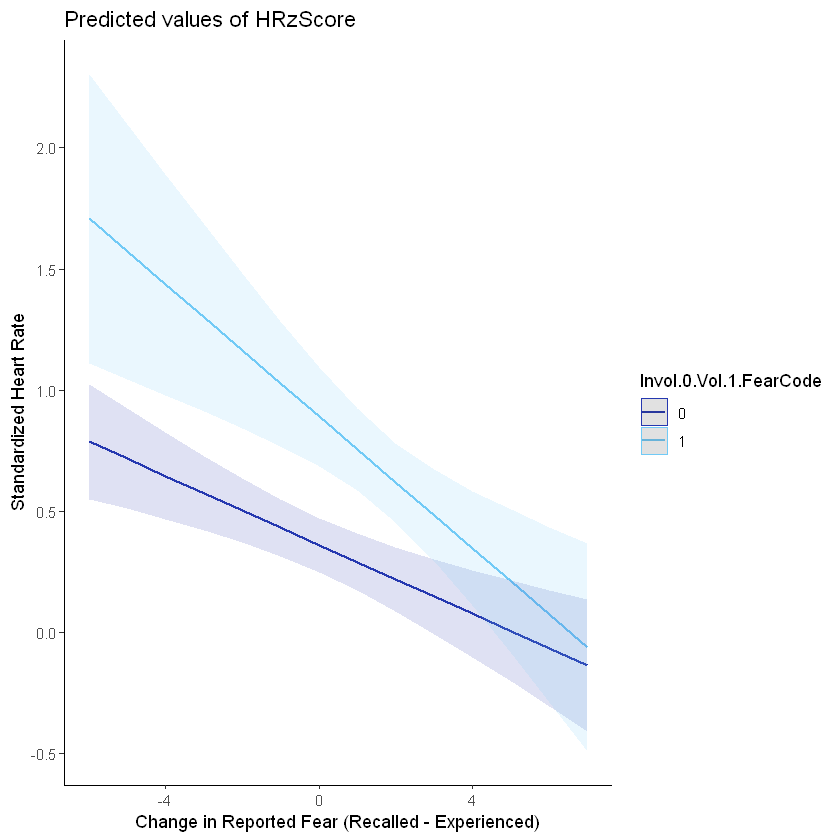

In [38]:
hr_fearchange_int <- lmer(HRzScore ~ FearChange * Invol.0.Vol.1.FearCode + (1|PID), data=df)
summary(hr_fearchange_int)

# Invol.0.Vol.1.FearCode

Mod_Emo_HR <- plot_model(hr_fearchange_int, type = "int")
Mod_Emo_HR <- Mod_Emo_HR + theme_classic() + scale_fill_manual(values=c("#2538B0","#71CAF6"))+ scale_color_manual(values=c("#2538B0","#71CAF6")) 
Mod_Emo_HR + ylab("Standardized Heart Rate") + xlab("Change in Reported Fear (Recalled - Experienced)")


A negative relationship was found between heart rate and changes in reported fear. 
Events that were characterized upon recall with greater fear than were originally experienced in the haunted house were associated with lower heart rate at the time of the event. In contrast, events that were recalled as being less fear-inducing than initially experienced were associated with higher heart rate at the time of the event. 

The endorsement of the event as being fear-eliciting or not did not significantly moderate this effect.

## HR and Recalled Fear

In [28]:
hr_recallfear <- lmer(HRzScore ~ RecalledFear + (1|PID), data=df)
summary(hr_recallfear)

Linear mixed model fit by REML ['lmerMod']
Formula: HRzScore ~ RecalledFear + (1 | PID)
   Data: df

REML criterion at convergence: 514

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.94884 -0.57805 -0.02138  0.58835  2.49076 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept) 0.1046   0.3234  
 Residual             0.2920   0.5403  
Number of obs: 283, groups:  PID, 44

Fixed effects:
             Estimate Std. Error t value
(Intercept)   0.15572    0.08602   1.810
RecalledFear  0.08584    0.01934   4.439

Correlation of Fixed Effects:
            (Intr)
RecalledFer -0.726

Linear mixed model fit by REML ['lmerMod']
Formula: HRzScore ~ RecalledFear * Invol.0.Vol.1.FearCode + (1 | PID)
   Data: df

REML criterion at convergence: 519.2

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.01163 -0.59939 -0.00834  0.57582  2.44856 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept) 0.1028   0.3206  
 Residual             0.2933   0.5416  
Number of obs: 283, groups:  PID, 44

Fixed effects:
                                    Estimate Std. Error t value
(Intercept)                          0.19354    0.09260   2.090
RecalledFear                         0.06500    0.02640   2.462
Invol.0.Vol.1.FearCode              -0.05001    0.29942  -0.167
RecalledFear:Invol.0.Vol.1.FearCode  0.03278    0.05839   0.561

Correlation of Fixed Effects:
            (Intr) RclldF I.0.V.
RecalledFer -0.741              
In.0.V.1.FC -0.192  0.189       
RF:I.0.V.1.  0.293 -0.405 -0.937

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


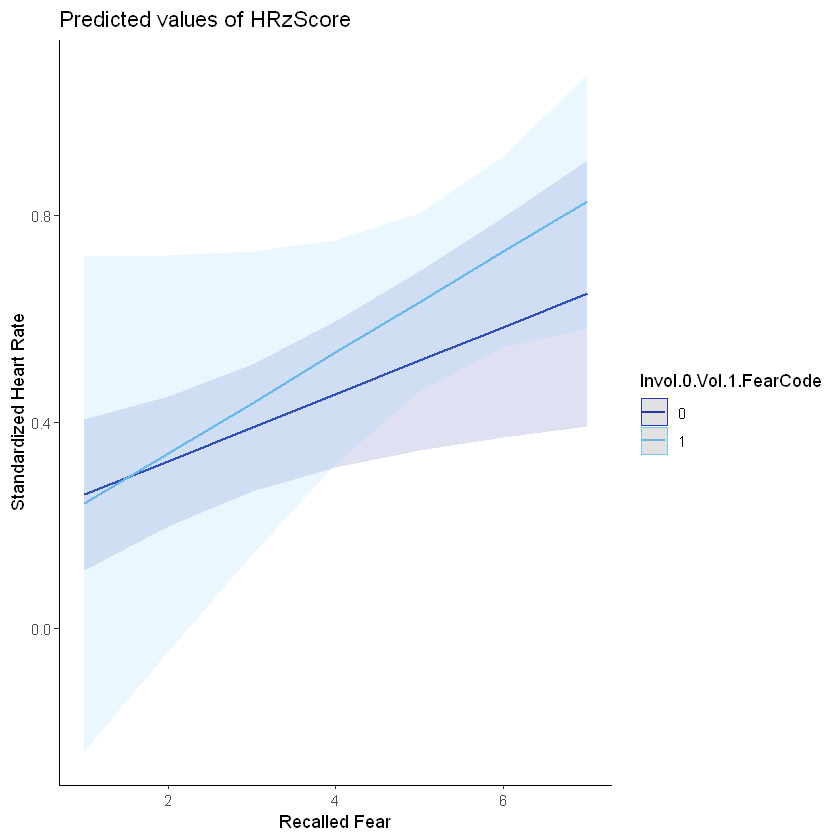

In [36]:
hr_fear_int <- lmer(HRzScore ~ RecalledFear * Invol.0.Vol.1.FearCode + (1|PID), data=df)
summary(hr_fear_int)

# Invol.0.Vol.1.FearCode

Mod_Emo_HR <- plot_model(hr_fear_int, type = "int")
Mod_Emo_HR <- Mod_Emo_HR + theme_classic() + scale_fill_manual(values=c("#2538B0","#71CAF6"))+ scale_color_manual(values=c("#2538B0","#71CAF6")) 
Mod_Emo_HR + ylab("Standardized Heart Rate") + xlab("Recalled Fear")


Linear mixed model fit by REML ['lmerMod']
Formula: HRzScore ~ ExpFearConvert * Invol.0.Vol.1.FearCode + (1 | PID)
   Data: df

REML criterion at convergence: 368.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7753 -0.6371 -0.1019  0.6022  2.4214 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept) 0.04404  0.2099  
 Residual             0.21580  0.4645  
Number of obs: 247, groups:  PID, 43

Fixed effects:
                                      Estimate Std. Error t value
(Intercept)                           0.117733   0.088760   1.326
ExpFearConvert                        0.120147   0.024163   4.972
Invol.0.Vol.1.FearCode                0.148604   0.170132   0.873
ExpFearConvert:Invol.0.Vol.1.FearCode 0.005442   0.042096   0.129

Correlation of Fixed Effects:
            (Intr) ExpFrC I.0.V.
ExpFerCnvrt -0.840              
In.0.V.1.FC -0.405  0.388       
EFC:I.0.V.1  0.413 -0.507 -0.898

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


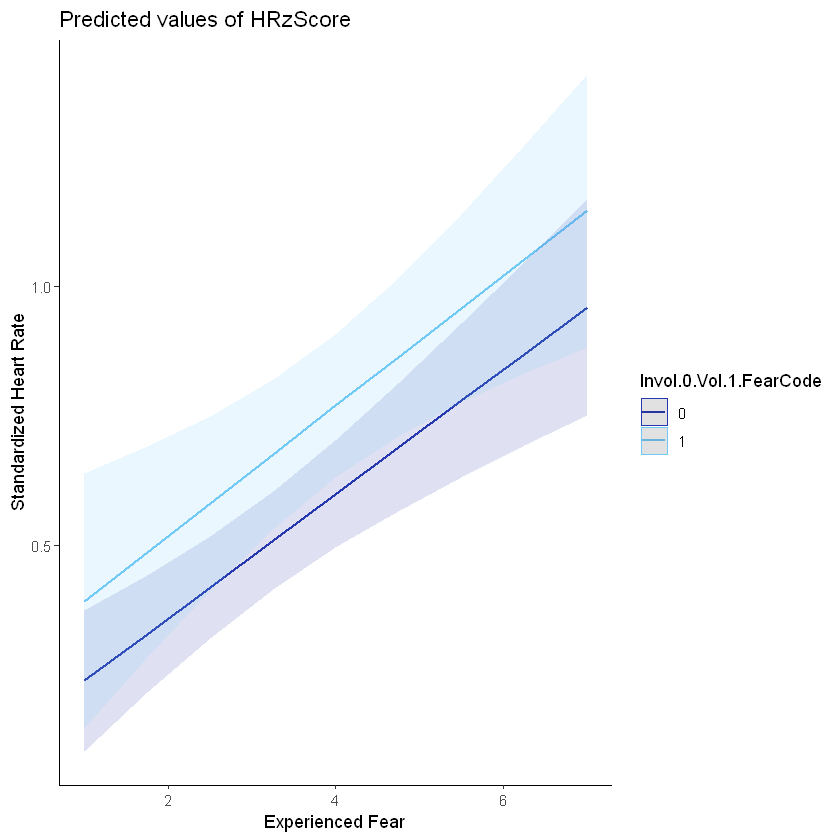

In [37]:
hr_expfear_int <- lmer(HRzScore ~ ExpFearConvert * Invol.0.Vol.1.FearCode + (1|PID), data=df)
summary(hr_expfear_int)

# Invol.0.Vol.1.FearCode

Mod_Emo_HR <- plot_model(hr_expfear_int, type = "int")
Mod_Emo_HR <- Mod_Emo_HR + theme_classic() + scale_fill_manual(values=c("#2538B0","#71CAF6"))+ scale_color_manual(values=c("#2538B0","#71CAF6")) 
Mod_Emo_HR + ylab("Standardized Heart Rate") + xlab("Experienced Fear")


## Try to make a 3d heatmap with emotion, emotion extent, hr, and counts

In [20]:
setwd("C:\\Users\\joann\\Downloads\\JupyterNotebook\\R Notebooks\\FrightNight")

df<- read.csv("3dHeatmap.csv")

ERROR: Error in panel.3dbars(): argument "z" is missing, with no default


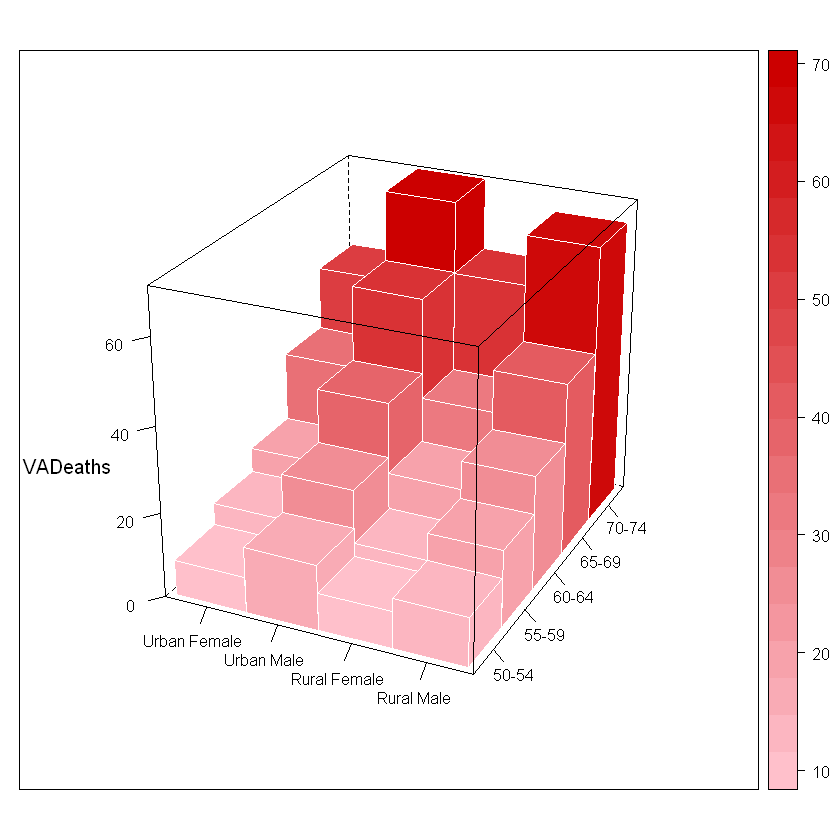

In [40]:
# A function generating colors
cols<-function(n) {
   colorRampPalette(c("#FFC0CB", "#CC0000"))(85)                                 # 20 distinct colors
}
# The plot
cloud(VADeaths, panel.3d.cloud = panel.3dbars, col="white",                      # white borders for bars
  xbase = 1, ybase = 1, zlim = c(0, max(VADeaths)),                              # No space around the bars
  scales = list(arrows = FALSE, just = "right"), xlab = NULL, ylab = NULL,
  col.facet = level.colors(VADeaths, at = do.breaks(range(VADeaths), 20),        
                           col.regions = cols,                                   # color ramp for filling the bars
                           colors = TRUE),
  colorkey = list(col = cols, at = do.breaks(range(VADeaths), 20)),
  screen = list(z = 65, x = -65))  

panel.3dbars()

In [47]:
VADeaths


,Rural Male,Rural Female,Urban Male,Urban Female
50-54,11.7,8.7,15.4,8.4
55-59,18.1,11.7,24.3,13.6
60-64,26.9,20.3,37.0,19.3
65-69,41.0,30.9,54.6,35.1
70-74,66.0,54.3,71.1,50.0


In [105]:
setwd("C:\\Users\\joann\\Downloads\\FrightNight\\Manuscript\\Revisions")
pt = read.csv("pivot2.csv")

setwd("C:\\Users\\joann\\Downloads\\JupyterNotebook\\R Notebooks\\FrightNight")
hm<- read.csv("3dHeatmap.csv")
ptC = read.csv("pivotCount.csv")

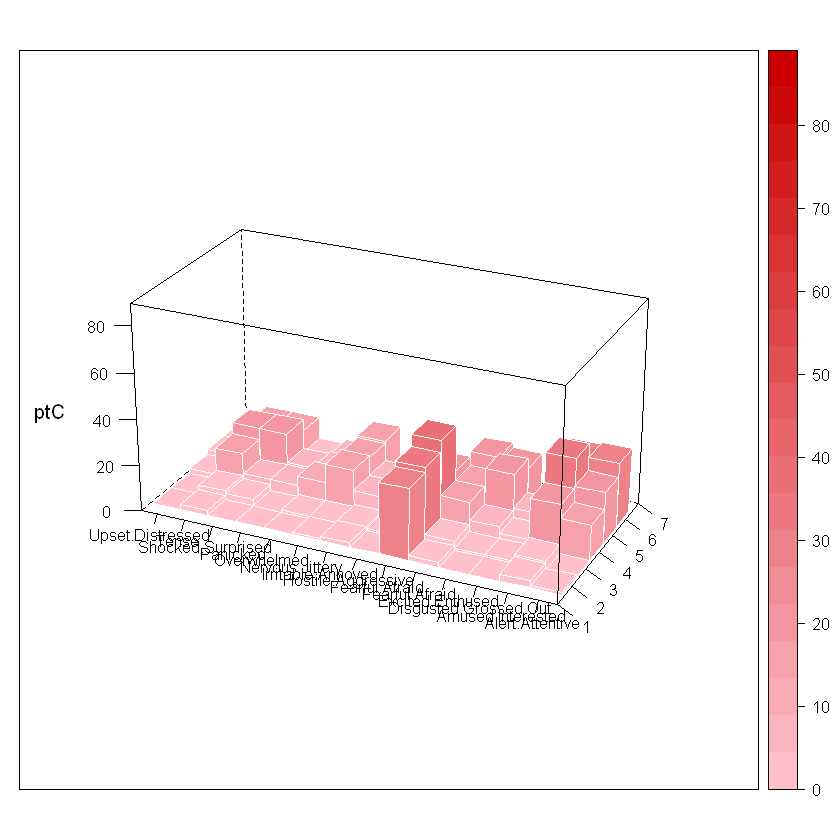

In [89]:
cloud(ptC, panel.3d.cloud = panel.3dbars, col="white",                      # white borders for bars
  xbase = 1, ybase = 1, zlim = c(0, max(ptC)),                              # No space around the bars
  scales = list(arrows = FALSE, just = "right"), xlab = NULL, ylab = NULL,
  col.facet = level.colors(ptC, at = do.breaks(range(ptC), 20),        
                           col.regions = cols,                                   # color ramp for filling the bars
                           colors = TRUE),
  colorkey = list(col = cols, at = do.breaks(range(ptC), 20)),
  screen = list(z = 65, x = -65))  

# panel.3dbars()

In [106]:
ptC = data.matrix(ptC, rownames.force = NA)

In [107]:
ptC[is.na(ptC)] <- 0

In [108]:
ptC

EmotionExtent,Alert.Attentive,Amused.Interested,Disgusted.Grossed.Out,Excited.Enthused,Fearful.Afraid,Fearful.Afraid.,Hostile.Aggressive,Irritable.Annoyed,Nervous.Jittery,Overwhelmed,Panicked,Shocked.Surprised,Tense,Upset.Distressed
1,0,0,0,0,0,89,0,0,0,0,0,0,0,0
2,1,3,0,0,2,31,0,2,1,0,0,0,2,0
3,0,4,1,1,4,33,1,2,1,1,0,3,4,0
4,15,21,3,6,14,38,0,8,17,9,5,5,14,2
5,22,34,7,22,14,18,0,8,16,7,6,19,19,4
6,28,27,0,18,20,7,1,4,17,6,4,14,14,4
7,58,61,5,34,16,2,0,4,18,8,10,14,25,4


In [109]:
ptC<-ptC[,-1]

In [104]:
ptC

Alert.Attentive,Amused.Interested,Disgusted.Grossed.Out,Excited.Enthused,Fearful.Afraid,Fearful.Afraid.,Hostile.Aggressive,Irritable.Annoyed,Nervous.Jittery,Overwhelmed,Panicked,Shocked.Surprised,Tense,Upset.Distressed
0,0,0,0,0,89,0,0,0,0,0,0,0,0
1,3,0,0,2,31,0,2,1,0,0,0,2,0
0,4,1,1,4,33,1,2,1,1,0,3,4,0
15,21,3,6,14,38,0,8,17,9,5,5,14,2
22,34,7,22,14,18,0,8,16,7,6,19,19,4
28,27,0,18,20,7,1,4,17,6,4,14,14,4
58,61,5,34,16,2,0,4,18,8,10,14,25,4


ERROR: Error in text3D(x = 1:7, y = rep(0.5, 7), z = rep(3, 7), labels = rownames(ptC), : 'labels' should have same length as 'x'


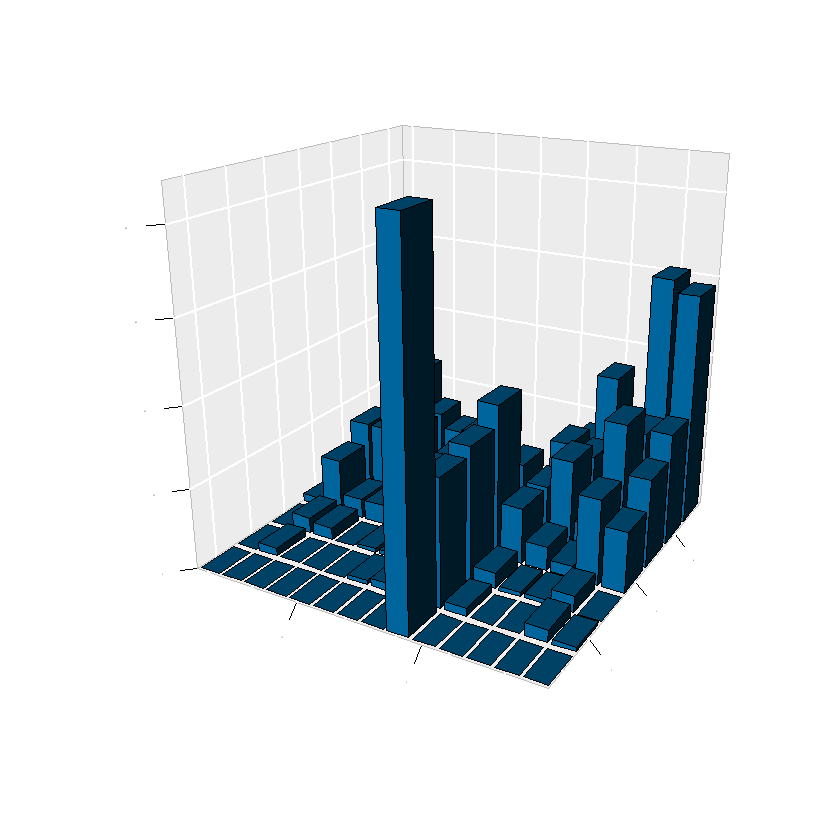

In [115]:
hist3D (x = 1:7, y = 1:14, z = ptC,
        bty = "g", phi = 20,  theta = -60,
        xlab = "", ylab = "", zlab = "", main = "",
        col = "#0072B2", border = "black", shade = 0.8,
        ticktype = "detailed", space = 0.15, d = 2, cex.axis = 1e-9)
# Use text3D to label x axis
 text3D(x = 1:7, y = rep(0.5, 7), z = rep(3, 7),
       labels = rownames(ptC),
       add = TRUE, adj = 0)
# Use text3D to label y axis
 text3D(x = rep(1, 7),   y = 1:4, z = rep(0, 7),
       labels  = colnames(ptC),
       add = TRUE, adj = 1)

In [112]:
hist3D_fancy(hm$EmotionExtent, hm$Emotions, colvar=hm$hrAvg,
             breaks =30)

ERROR: Error in Summary.factor(structure(c(6L, 1L, 2L, 5L, 6L, 8L, 9L, 16L, 2L, : 'min' not meaningful for factors
